In [1]:
install.packages("viridis")
library("viridis")
install.packages("missMDA")
library("missMDA")
install.packages("factoextra")
library("factoextra")
install.packages("MASS")
library("MASS")
install.packages("tidyverse")
library("tidyverse")
install.packages("anomalize")
library("anomalize")
install.packages("ggthemes")
library("ggthemes")
install.packages("ggbeeswarm")
library("ggbeeswarm")
install.packages("reshape")
library("reshape")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'viridis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpA7mMIz\downloaded_packages


Warning message:
"package 'viridis' was built under R version 3.6.2"
Loading required package: viridisLite

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpA7mMIz\downloaded_packages


Warning message:
"package 'missMDA' was built under R version 3.6.2"
Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpA7mMIz\downloaded_packages


Warning message:
"package 'factoextra' was built under R version 3.6.2"
Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpA7mMIz\downloaded_packages


Warning message:
"package 'MASS' was built under R version 3.6.2"
Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpA7mMIz\downloaded_packages


Warning message:
"package 'tidyverse' was built under R version 3.6.2"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.3     

Warning message:
"package 'tidyr' was built under R version 3.6.2"
Warning message:
"package 'readr' was built under R version 3.6.2"
Warning message:
"package 'dplyr' was built under R version 3.6.2"
Warning message:
"package 'forcats' was built under R version 3.6.2"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependencies 'TTR', 'quadprog', 'quantmod', 'fracdiff', 'timeDate', 'tseries', 'urca', 'RcppArmadillo', 'padr', 'xts', 'forecast', 't


  There are binary versions available but the source versions are later:
                   binary      source needs_compilation
RcppArmadillo 0.9.800.4.0 0.9.850.1.0              TRUE
forecast             8.10        8.11              TRUE

  Binaries will be installed
package 'TTR' successfully unpacked and MD5 sums checked
package 'quadprog' successfully unpacked and MD5 sums checked
package 'quantmod' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'padr' successfully unpacked and MD5 sums checked
package 'xts' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked
package 'timetk' successfully unpacked and MD5 sums checked


Warning message:
"package 'anomalize' was built under R version 3.6.2"
== Use anomalize to improve your Forecasts by 50%! =============================
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpA7mMIz\downloaded_packages


Warning message:
"package 'ggthemes' was built under R version 3.6.2"
Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependencies 'beeswarm', 'vipor'




package 'beeswarm' successfully unpacked and MD5 sums checked
package 'vipor' successfully unpacked and MD5 sums checked
package 'ggbeeswarm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpA7mMIz\downloaded_packages


Warning message:
"package 'ggbeeswarm' was built under R version 3.6.2"
Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'reshape' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpA7mMIz\downloaded_packages


Warning message:
"package 'reshape' was built under R version 3.6.2"

Attaching package: 'reshape'


The following object is masked from 'package:dplyr':

    rename


The following objects are masked from 'package:tidyr':

    expand, smiths




In [2]:
ionomics <- read.csv("New_ionStats.csv",header = TRUE,colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA) )
ionomics <- imputePCA(ionomics, method = "Regularized")

In [3]:
ionsPCA <- prcomp(ionomics$completeObs,scale = FALSE)
ionsPCAvar <- princomp(ionomics$completeObs, cor = FALSE,score = TRUE)

In [4]:
eig.val <- get_eigenvalue(ionsPCA)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,5.2752459817,3.324057e+01,33.24057
Dim.2,2.5325190217,1.595800e+01,49.19857
Dim.3,2.2306606992,1.405592e+01,63.25449
Dim.4,1.3084785755,8.245033e+00,71.49953
Dim.5,0.9035658064,5.693582e+00,77.19311
Dim.6,0.8267759318,5.209711e+00,82.40282
Dim.7,0.6922196062,4.361839e+00,86.76466
Dim.8,0.4962919336,3.127253e+00,89.89191
Dim.9,0.4018493896,2.532148e+00,92.42406


This shows the different dimensions, or eigenvalues associated with this PCA. The values are ranked from largest to smallest, as a larger value indicates more % variance explained. This also shows us the % variance explained by each dimension (multiply the eigenvalue by 10), as well as the cumulative % variance explained. With only 2 dimensions, we can explain 49% of the variance of 20 dimensions. 

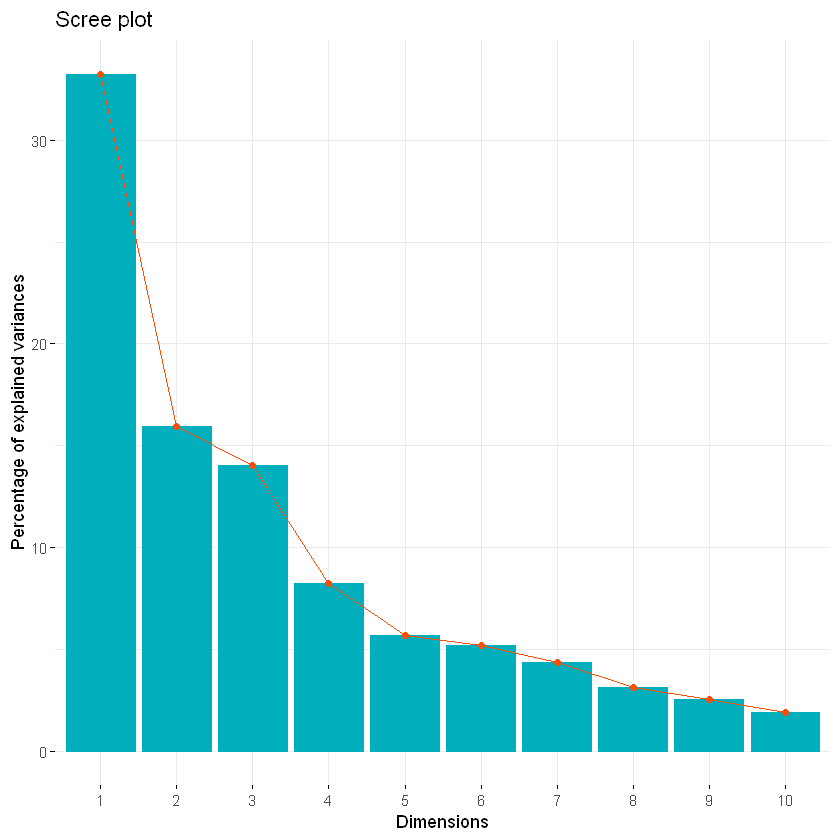

In [5]:
fviz_eig(ionsPCA, linecolor = "#FC4E07",
   barcolor = "#00AFBB", barfill = "#00AFBB")

In [6]:
summary(ionsPCAvar)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.2910698 1.5874254 1.4898197 1.14103844 0.94819326
Proportion of Variance 0.3324057 0.1595800 0.1405592 0.08245033 0.05693582
Cumulative Proportion  0.3324057 0.4919857 0.6325449 0.71499526 0.77193107
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.90700751 0.82992513 0.70272528 0.63233705 0.55229218
Proportion of Variance 0.05209711 0.04361839 0.03127253 0.02532148 0.01931655
Cumulative Proportion  0.82402818 0.86764657 0.89891910 0.92424058 0.94355713
                          Comp.11    Comp.12    Comp.13     Comp.14    Comp.15
Standard deviation     0.51003648 0.45147937 0.40087390 0.342489403 0.29100273
Proportion of Variance 0.01647382 0.01290826 0.01017671 0.007428243 0.00536273
Cumulative Proportion  0.96003095 0.97293921 0.98311592 0.990544165 0.99590690
                           Comp.16      Comp.1

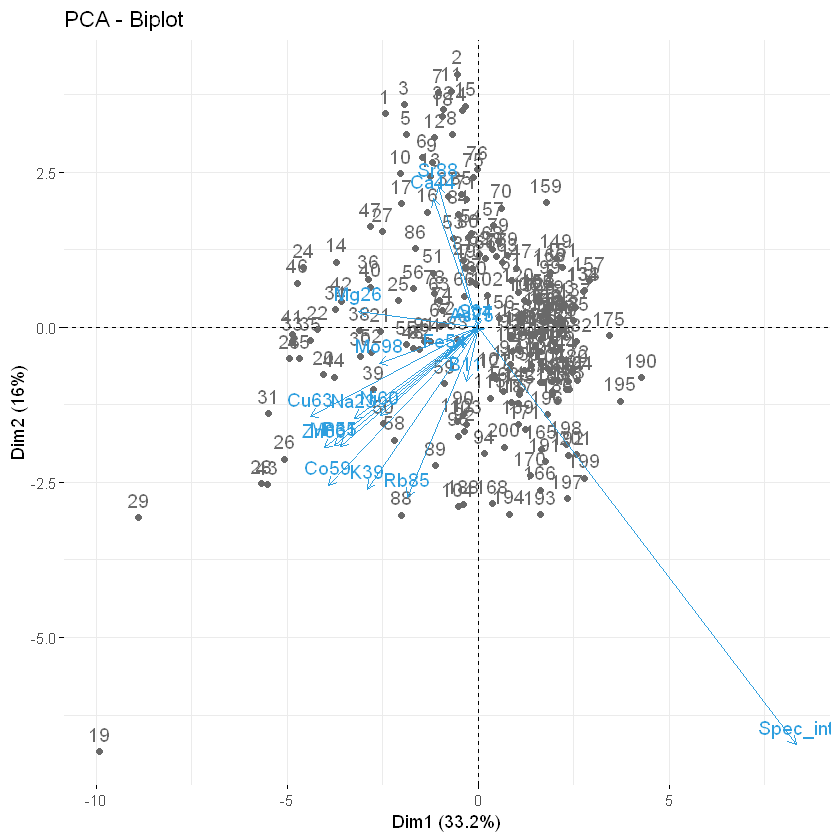

In [7]:
fviz_pca_biplot(ionsPCA, repel = FALSE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

* Positively correlated variables are grouped together
* Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
* The distance between variables and the origin measures the quality of the variables on the factor map. Variables that are away from the origin are well represented on the factor map.

From [here](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)

In [8]:
pcaVars <- get_pca_var(ionsPCA)
pcaVars$contrib[,1]
pcaVars$contrib[,2]

Spec_int          B11         Na23         Mg26         Al27          P31 
35.214514526  0.049187970  5.357413776  4.975168430  0.004862392  6.656899295 
         S34          K39         Ca44         Fe54         Mn55         Co59 
 0.001495571  4.306955339  0.712154694  0.384258481  7.249209747  7.815149677 
        Ni60         Cu63         Zn66         As75         Rb85         Sr88 
 3.324566086  9.889731734  8.312309229  0.013337088  1.746612814  0.554611956 
        Mo98 
 3.431561194

Spec_int          B11         Na23         Mg26         Al27          P31 
4.806660e+01 7.981246e-01 2.275479e+00 6.884675e-02 1.361523e-03 3.897103e+00 
         S34          K39         Ca44         Fe54         Mn55         Co59 
3.557642e-04 7.210950e+00 4.542616e+00 2.637154e-01 3.866090e+00 6.876450e+00 
        Ni60         Cu63         Zn66         As75         Rb85         Sr88 
2.135771e+00 2.211180e+00 4.013717e+00 7.348779e-03 7.943363e+00 5.460726e+00 
        Mo98 
3.602036e-01

Basically plotting Ca + Sr vs P + Cu

In [9]:
cor(ionomics$completeObs)

,Spec_int,B11,Na23,Mg26,Al27,P31,S34,K39,Ca44,Fe54,Mn55,Co59,Ni60,Cu63,Zn66,As75,Rb85,Sr88,Mo98
Spec_int,1.000000000,0.09642291,-0.3079131,-0.27107978,-0.18404446,-0.24750776,-0.20391523,-0.1414772,-0.09407182,-0.008432847,-0.21288143,-0.217413018,-0.29978587,-0.34238826,-0.27216335,-0.24265307,-0.06141108,-0.110516336,-0.16570822
B11,0.096422911,1.00000000,0.4309633,-0.02956386,0.18411244,0.02309360,0.07098936,0.1769154,-0.03489512,0.200651958,0.08907968,0.088873189,0.16107869,0.13858582,0.22374272,0.22436845,0.21076511,-0.029578613,0.06744739
Na23,-0.307913129,0.43096333,1.0000000,0.12907723,0.39203376,0.36031883,0.22366375,0.3715863,-0.12025489,0.128802037,0.33437873,0.337488857,0.43484446,0.39632920,0.41875078,0.37648421,0.25898240,-0.107809537,0.10611074
Mg26,-0.271079779,-0.02956386,0.1290772,1.00000000,0.15658144,0.39207989,0.29646736,0.2690713,0.29463245,0.110408344,0.21098861,0.213238525,0.27194673,0.49565575,0.37440567,0.35479204,0.03195432,0.323981598,0.10926659
Al27,-0.184044465,0.18411244,0.3920338,0.15658144,1.00000000,0.29222274,0.23264476,0.2101993,0.02223372,0.109942065,0.25598103,0.253666532,0.27939645,0.29201071,0.31237821,0.33149371,0.21148786,0.120568912,0.14421044
P31,-0.247507756,0.02309360,0.3603188,0.39207989,0.29222274,1.00000000,0.52713514,0.5597728,0.02683198,0.266266201,0.31958279,0.382441656,0.49919557,0.67993136,0.39962167,0.36279208,0.28938941,0.013776513,0.38178729
S34,-0.203915225,0.07098936,0.2236638,0.29646736,0.23264476,0.52713514,1.00000000,0.2614299,0.36938557,0.454955282,0.56711032,0.489083190,0.34250737,0.45900450,0.47469580,0.32821946,0.19655225,0.308912810,0.45135384
K39,-0.141477213,0.17691543,0.3715863,0.26907135,0.21019925,0.55977279,0.26142993,1.0000000,-0.13073687,0.106169355,0.16972404,0.217145970,0.43512304,0.47202609,0.34253646,0.35136071,0.34697929,-0.144855793,0.17464026
Ca44,-0.094071821,-0.03489512,-0.1202549,0.29463245,0.02223372,0.02683198,0.36938557,-0.1307369,1.00000000,0.400641298,0.23446682,0.058550633,-0.05293287,0.08152868,0.19280606,-0.02580560,-0.27358045,0.868185116,0.26263906
Fe54,-0.008432847,0.20065196,0.1288020,0.11040834,0.10994207,0.26626620,0.45495528,0.1061694,0.40064130,1.000000000,0.34798001,0.339083832,0.22174352,0.24331276,0.32787523,0.08743444,0.09458807,0.327859839,0.33102341


In [10]:
cov(ionomics$completeObs)

,Spec_int,B11,Na23,Mg26,Al27,P31,S34,K39,Ca44,Fe54,Mn55,Co59,Ni60,Cu63,Zn66,As75,Rb85,Sr88,Mo98
Spec_int,3.399104478,0.0835849560,-0.547497449,-0.499780586,-0.0146024022,-0.419195973,-0.0059174537,-0.260836733,-0.1734370226,-0.007373337,-0.39248225,-0.400836994,-0.342334172,-0.623765357,-0.472352982,-0.0222259337,-0.113221528,-0.203755214,-0.305510616
B11,0.083584956,0.2210707310,0.195423858,-0.013900385,0.0037253583,0.009974780,0.0005253659,0.083182378,-0.0164070454,0.044742124,0.04188362,0.041786537,0.046909473,0.064387944,0.099030575,0.0052410629,0.099097876,-0.013907319,0.031712519
Na23,-0.547497449,0.1954238581,0.930129187,0.124486220,0.0162710056,0.319230686,0.0033952378,0.358369744,-0.1159776757,0.058911752,0.32248556,0.325485067,0.259754101,0.377700741,0.380173662,0.0180389129,0.249770930,-0.103974973,0.102336597
Mg26,-0.499780586,-0.0139003845,0.124486220,1.000000009,0.0067384430,0.360180839,0.0046663773,0.269071346,0.2946324497,0.052361185,0.21098861,0.213238523,0.168438235,0.489779138,0.352449735,0.0176264899,0.031954320,0.323981598,0.109266587
Al27,-0.014602402,0.0037253583,0.016271006,0.006738443,0.0018519897,0.011552589,0.0001575852,0.009045872,0.0009568226,0.002243834,0.01101608,0.010916476,0.007447268,0.012417615,0.012654785,0.0007087394,0.009101328,0.005188653,0.006206060
P31,-0.419195973,0.0099747801,0.319230686,0.360180839,0.0115525890,0.843902092,0.0076220353,0.514230479,0.0246489704,0.116003113,0.29358199,0.351326748,0.284036131,0.617207552,0.345580975,0.0165575392,0.265845108,0.012655676,0.350725627
S34,-0.005917454,0.0005253659,0.003395238,0.004666377,0.0001575852,0.007622035,0.0002477456,0.004114890,0.0058141051,0.003396090,0.00892628,0.007698138,0.003339102,0.007139043,0.007033526,0.0002566606,0.003093720,0.004862268,0.007104280
K39,-0.260836733,0.0831823780,0.358369744,0.269071346,0.0090458723,0.514230479,0.0041148903,0.999999991,-0.1307368736,0.050350843,0.16972403,0.217145966,0.269506294,0.466429632,0.322449398,0.0174560172,0.346979294,-0.144855791,0.174640257
Ca44,-0.173437023,-0.0164070454,-0.115977676,0.294632450,0.0009568226,0.024648970,0.0058141051,-0.130736874,1.0000000070,0.190004238,0.23446682,0.058550632,-0.032785538,0.080562057,0.181499508,-0.0012820526,-0.273580449,0.868185115,0.262639057
Fe54,-0.007373337,0.0447421239,0.058911752,0.052361185,0.0022438341,0.116003113,0.0033960904,0.050350843,0.1900042375,0.224913302,0.16502961,0.160810591,0.065135138,0.114023034,0.146376362,0.0020600704,0.044858417,0.155487611,0.156987938


This data lacks a categorical variable, so LDA (discriminante factor analysis), clustering, and anova are all rendered obsolete. We could come up with a categorical variable. Will use species as cat. var. in geneva data when I get there. Kruskill wallace also requires a categorical variable. What are we trying to measure the difference in? If its just ions we can compute the variance for each and just compare them as the scale and distro. are similar. 

In [11]:
for (i in 2:19) {
    print(var(ionomics$completeObs[,i]))
}

[1] 0.2210707
[1] 0.9301292
[1] 1
[1] 0.00185199
[1] 0.8439021
[1] 0.0002477456
[1] 1
[1] 1
[1] 0.2249133
[1] 1
[1] 1
[1] 0.383631
[1] 0.9764281
[1] 0.8861547
[1] 0.00246822
[1] 1
[1] 1
[1] 1


What does var. =1 mean?

In [12]:
lda <- lda(grouping = ionomics$completeObs[,1], x = ionomics$completeObs[,2:19])

The means can act as a fingerprint for the ionome of this dataset. Lets preform an anova on this. 

In [13]:
lda$means

,B11,Na23,Mg26,Al27,P31,S34,K39,Ca44,Fe54,Mn55,Co59,Ni60,Cu63,Zn66,As75,Rb85,Sr88,Mo98
1,-0.229050928,-0.06091751,-0.695502243,-0.08728364,-0.53526460,0.06079159,-0.7820116,-0.2647788,-0.20624750,-0.2661672,-0.3671701,-0.239359040,-0.75791389,-0.29828979,-0.09426449,0.41313063,-0.08363468,-0.205634228
2,-0.254001333,-0.05013798,-0.001718964,-0.08032166,0.08527935,0.07197670,-0.3076795,0.1608897,-0.21178564,-0.1089169,-0.1377138,-0.053386469,0.28712655,0.12550132,-0.06470929,-0.32847097,0.20244506,-0.575485713
3,0.098740909,0.91042897,0.748484074,-0.03570808,1.27622506,0.08788726,0.8535065,0.5417960,0.39759998,1.1265376,1.1120246,0.883684637,1.67505618,1.14568287,-0.04502819,0.39165724,0.46389042,1.576602170
4,-0.181591578,0.25543889,0.855494591,-0.07491637,-0.02535514,0.06752715,0.1872560,-0.2101313,-0.41571769,-0.1609939,-0.1512122,0.007904723,0.24715681,0.06098879,-0.04885676,-0.37739251,-0.16708639,-0.661364298
5,-0.597863058,0.17663030,-0.431020745,-0.04137531,0.85838178,0.07009565,0.2177744,-0.9875157,-0.39080975,0.8028992,2.3159971,1.913089700,-0.31302968,0.07900019,-0.05057997,0.38682825,-0.91774653,-0.614517904
6,-0.018240356,-0.26113702,-0.565014554,-0.08393230,-0.35729480,0.07105793,-0.1269806,0.2364597,0.04957302,-0.2262748,-0.3047431,-0.211164880,-0.67631034,-0.27012743,-0.09371025,-0.07087182,0.14581545,-0.060549786
7,-0.004895985,-0.44187525,-0.010065178,-0.08676093,-0.11327303,0.06198476,-0.3711841,-0.4654501,-0.20446417,-0.4713296,-0.4647659,-0.203609791,0.01329129,-0.45736706,-0.09945000,0.28222827,-0.25857600,-0.217789078
8,0.046927246,-0.24245686,-0.456962219,-0.07679110,-0.11050558,0.06102744,-0.2784532,-0.3980665,-0.02553860,0.2176895,0.1488680,-0.111391548,-0.05042366,0.18559723,-0.06744532,-0.34286425,-0.52391214,-0.008585152
